In [43]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [55]:
# Load JSON data
file_path = r'C:\Users\vladi\Desktop\va_pension.json'
with open(file_path, 'r') as file:
    json_data = json.load(file)

In [59]:
# Extract the data from the nested structure
data_rows = json_data['data']
columns = [col['fieldName'] for col in json_data['meta']['view']['columns'] if 'fieldName' in col]
pension_data = pd.DataFrame(data_rows, columns=columns)

In [60]:
# Convert data types
pension_data['total_pension_recipients'] = pd.to_numeric(pension_data['total_pension_recipients'], errors='coerce')

In [63]:
# Define future behaviour for downcasting
pd.set_option('future.no_silent_downcasting', True)

In [64]:
# Filling missing values
pension_data.fillna(0, inplace=True)

In [65]:
# Convert data to excel and csv
excel_path = r'C:\Users\vladi\Desktop\va_pension.xlsx'
csv_path = r'C:\Users\vladi\Desktop\va_pension.csv'
pension_data.to_excel(excel_path, index=False)
pension_data.to_csv(csv_path, index=False)

In [66]:
# Statistical summary
print("\nStatistical summary:")
print(pension_data.describe())


Statistical summary:
       :position   :created_at  :created_meta   :updated_at  :updated_meta  \
count       54.0  5.400000e+01           54.0  5.400000e+01           54.0   
mean         0.0  1.713891e+09            0.0  1.713891e+09            0.0   
std          0.0  0.000000e+00            0.0  0.000000e+00            0.0   
min          0.0  1.713891e+09            0.0  1.713891e+09            0.0   
25%          0.0  1.713891e+09            0.0  1.713891e+09            0.0   
50%          0.0  1.713891e+09            0.0  1.713891e+09            0.0   
75%          0.0  1.713891e+09            0.0  1.713891e+09            0.0   
max          0.0  1.713891e+09            0.0  1.713891e+09            0.0   

       total_pension_recipients  
count                 54.000000  
mean                2815.574074  
std                 3096.552310  
min                   73.000000  
25%                  778.000000  
50%                 1835.000000  
75%                 3700.750000  
max

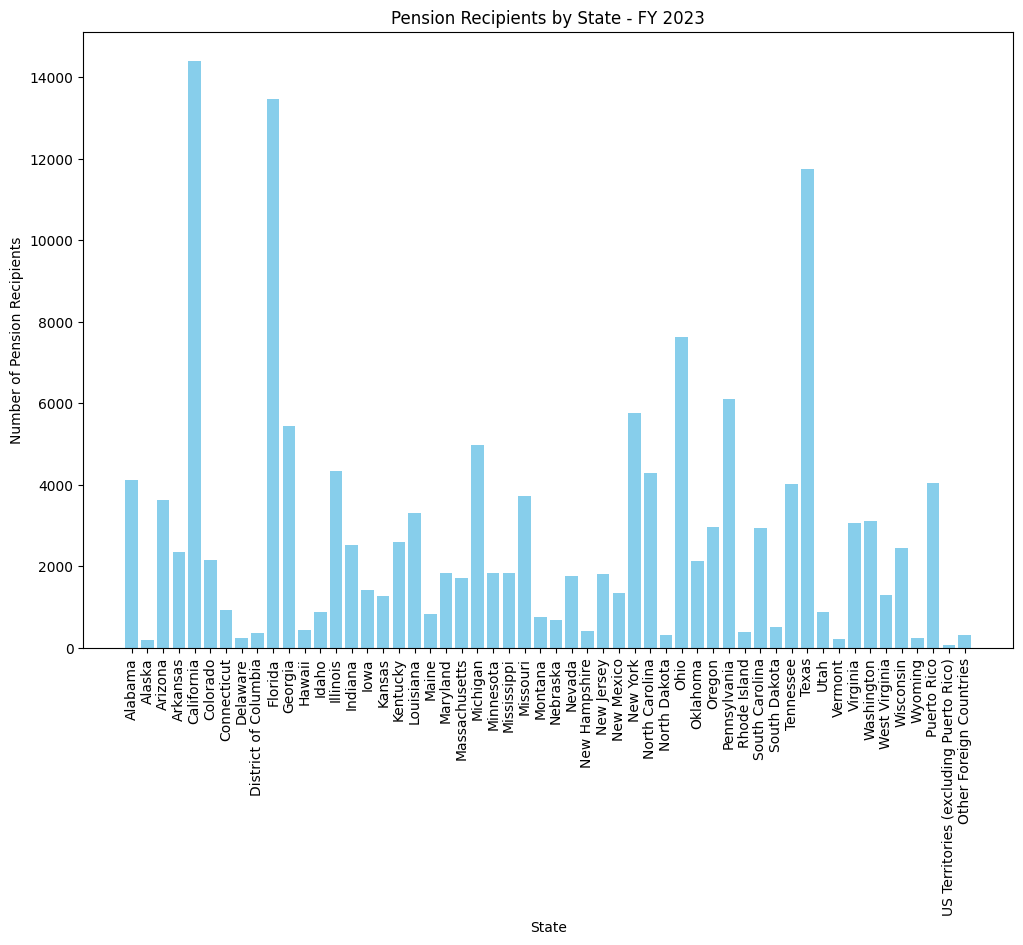

In [70]:
# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(pension_data['state'], pension_data['total_pension_recipients'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Pension Recipients')
plt.title('Pension Recipients by State - FY 2023')
plt.xticks(rotation=90)
plt.show()

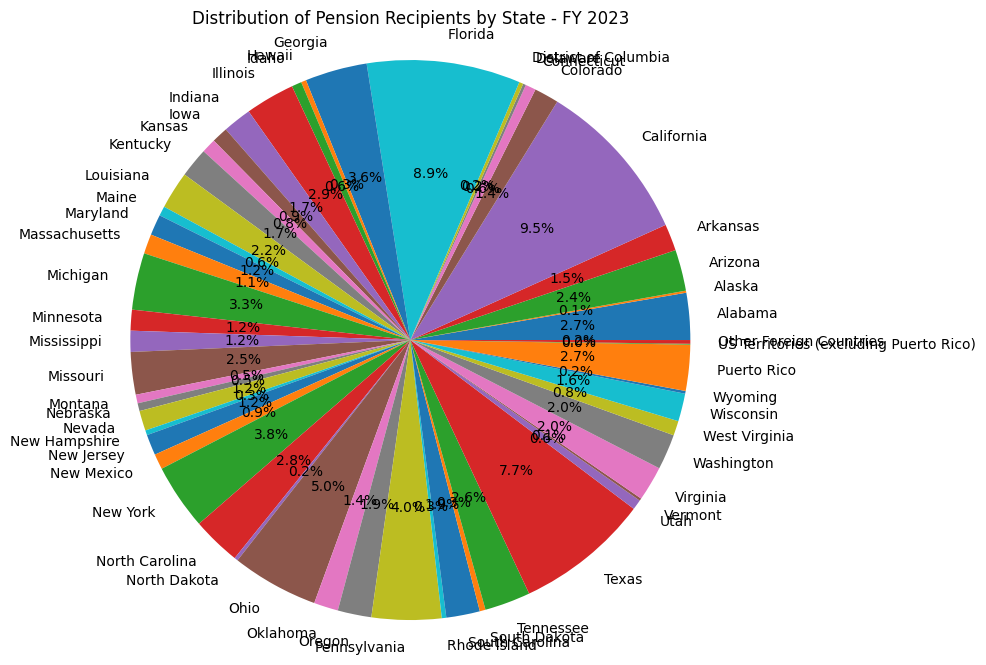

In [68]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(pension_data['total_pension_recipients'], labels=pension_data['state'], autopct='%1.1f%%')
plt.title('Distribution of Pension Recipients by State - FY 2023')
plt.axis('equal')
plt.show()

In [69]:
# Top five states with the highest number of pension recipients
top_states = pension_data.sort_values(by='total_pension_recipients', ascending=False).head(5)
print("\nTop 5 states with the highest number of pension recipients:")
print(top_states[['state', 'total_pension_recipients']])


Top 5 states with the highest number of pension recipients:
           state  total_pension_recipients
4     California                     14389
9        Florida                     13472
43         Texas                     11749
35          Ohio                      7622
38  Pennsylvania                      6111
